# Data Analysis

In [50]:
import pandas as pd
# Read data from .csv file
df = pd.read_csv('Zurich.csv')

In [51]:
df.dtypes

price      object
size       object
rooms      object
address    object
dtype: object

In [52]:
df.head()


,price,size,rooms,address
0,"CHF 3,110.– / month",96m² living space,4.5 rooms,"Rennweg 30, 8001 Zürich"
1,"CHF 6,210.– / month",140m² living space,5.5 rooms,"Bellariastrasse 56, 8038 Zürich"
2,"CHF 5,440.– / month",156m² living space,5.5 rooms,"Kleinertstrasse 2, 8037 Zürich"
3,"CHF 1,820.– / month",48m² living space,3.5 rooms,"Langmauerstrasse 25, 8006 Zürich"
4,"CHF 2,520.– / month",58m² living space,3 rooms,"Hohlstrasse 486, 8048 Zürich"


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    799 non-null    object
 1   size     635 non-null    object
 2   rooms    790 non-null    object
 3   address  799 non-null    object
dtypes: object(4)
memory usage: 25.1+ KB


In [54]:
df.shape

(799, 4)

In [55]:
df.columns = df.columns.str.title()
for col in df.columns:
    print(col)

Price
Size
Rooms
Address


In [56]:
df.rename(columns = {'Price':'Rent','Size':'SurfaceArea','Rooms':'RoomsNumber'}, inplace = True)
df


,Rent,SurfaceArea,RoomsNumber,Address
0,"CHF 3,110.– / month",96m² living space,4.5 rooms,"Rennweg 30, 8001 Zürich"
1,"CHF 6,210.– / month",140m² living space,5.5 rooms,"Bellariastrasse 56, 8038 Zürich"
2,"CHF 5,440.– / month",156m² living space,5.5 rooms,"Kleinertstrasse 2, 8037 Zürich"
3,"CHF 1,820.– / month",48m² living space,3.5 rooms,"Langmauerstrasse 25, 8006 Zürich"
4,"CHF 2,520.– / month",58m² living space,3 rooms,"Hohlstrasse 486, 8048 Zürich"
...,...,...,...,...
794,CHF 170.– / month,NaN,NaN,8004 Zürich
795,"CHF 1,180.– / month",NaN,NaN,8046 Zürich
796,"CHF 3,460.– / month",NaN,137m² living space,"Schauenbergstrasse 30, 8046 Zürich"
797,"CHF 5,160.– / month",160m² living space,5.5 rooms,"Schauenbergstrasse 32, 8046 Zürich"


In [57]:
#Checking rent column
df.iloc[:,0]

0       CHF 3,110.– / month
1       CHF 6,210.– / month
2       CHF 5,440.– / month
3       CHF 1,820.– / month
4       CHF 2,520.– / month
               ...         
794       CHF 170.– / month
795     CHF 1,180.– / month
796     CHF 3,460.– / month
797     CHF 5,160.– / month
798     CHF 2,810.– / month
Name: Rent, Length: 799, dtype: object

In [58]:
# Remove non-numeric characters except for the comma
df['Rent'] = df['Rent'].str.replace(r'[^\d,]', '', regex=True) # can be found online

# Remove commas
df['Rent'] = df['Rent'].str.replace(',', '')

# Convert to float, coercing errors to NaN
df['Rent'] = pd.to_numeric(df['Rent'], errors='coerce')

print(df)

       Rent          SurfaceArea          RoomsNumber  \
0    3110.0   96m² living space            4.5 rooms    
1    6210.0  140m² living space            5.5 rooms    
2    5440.0  156m² living space            5.5 rooms    
3    1820.0   48m² living space            3.5 rooms    
4    2520.0   58m² living space              3 rooms    
..      ...                  ...                  ...   
794   170.0                  NaN                  NaN   
795  1180.0                  NaN                  NaN   
796  3460.0                  NaN  137m² living space    
797  5160.0  160m² living space            5.5 rooms    
798  2810.0                  NaN             5 rooms    

                                Address  
0               Rennweg 30, 8001 Zürich  
1       Bellariastrasse 56, 8038 Zürich  
2        Kleinertstrasse 2, 8037 Zürich  
3      Langmauerstrasse 25, 8006 Zürich  
4          Hohlstrasse 486, 8048 Zürich  
..                                  ...  
794                  

In [59]:
# Remove non-numeric characters
df['SurfaceArea'] = df['SurfaceArea'].str.replace(r'[^\d]', '', regex=True)

# Convert to float, coercing errors to NaN
df['SurfaceArea'] = pd.to_numeric(df['SurfaceArea'], errors='coerce')

print(df)

       Rent  SurfaceArea          RoomsNumber  \
0    3110.0         96.0           4.5 rooms    
1    6210.0        140.0           5.5 rooms    
2    5440.0        156.0           5.5 rooms    
3    1820.0         48.0           3.5 rooms    
4    2520.0         58.0             3 rooms    
..      ...          ...                  ...   
794   170.0          NaN                  NaN   
795  1180.0          NaN                  NaN   
796  3460.0          NaN  137m² living space    
797  5160.0        160.0           5.5 rooms    
798  2810.0          NaN             5 rooms    

                                Address  
0               Rennweg 30, 8001 Zürich  
1       Bellariastrasse 56, 8038 Zürich  
2        Kleinertstrasse 2, 8037 Zürich  
3      Langmauerstrasse 25, 8006 Zürich  
4          Hohlstrasse 486, 8048 Zürich  
..                                  ...  
794                         8004 Zürich  
795                         8046 Zürich  
796  Schauenbergstrasse 30, 8046 

In [60]:
# Extract the numeric part and convert to float
df['RoomsNumber'] = df['RoomsNumber'].str.extract(r'(\d+\.?\d*)').astype(float)

# Note: The regex (\d+\.?\d*) captures:
# \d+ - One or more digits
# \.? - An optional decimal point
# \d* - Zero or more digits following the decimal point

print(df)

       Rent  SurfaceArea  RoomsNumber                             Address
0    3110.0         96.0          4.5             Rennweg 30, 8001 Zürich
1    6210.0        140.0          5.5     Bellariastrasse 56, 8038 Zürich
2    5440.0        156.0          5.5      Kleinertstrasse 2, 8037 Zürich
3    1820.0         48.0          3.5    Langmauerstrasse 25, 8006 Zürich
4    2520.0         58.0          3.0        Hohlstrasse 486, 8048 Zürich
..      ...          ...          ...                                 ...
794   170.0          NaN          NaN                         8004 Zürich
795  1180.0          NaN          NaN                         8046 Zürich
796  3460.0          NaN        137.0  Schauenbergstrasse 30, 8046 Zürich
797  5160.0        160.0          5.5  Schauenbergstrasse 32, 8046 Zürich
798  2810.0          NaN          5.0                         8055 Zürich

[799 rows x 4 columns]


In [61]:
df['Address']=df['Address'].str.replace('Zürich','Zurich') # not necessary - umlaut remove 
df['Address']

0                 Rennweg 30, 8001 Zurich
1         Bellariastrasse 56, 8038 Zurich
2          Kleinertstrasse 2, 8037 Zurich
3        Langmauerstrasse 25, 8006 Zurich
4            Hohlstrasse 486, 8048 Zurich
                      ...                
794                           8004 Zurich
795                           8046 Zurich
796    Schauenbergstrasse 30, 8046 Zurich
797    Schauenbergstrasse 32, 8046 Zurich
798                           8055 Zurich
Name: Address, Length: 799, dtype: object

In [62]:
# checking missing values, we do observe Rent, SurfaceArea, and NumRooms contain NAs

df.isnull()
df.isnull().sum()

Rent             9
SurfaceArea    164
RoomsNumber      9
Address          0
dtype: int64

In [73]:
# We drop the missing values and NaNs in rows.
df.dropna(subset=['Rent','SurfaceArea','RoomsNumber'],inplace=True)

# ----------------------------------------------------------

## new features

In [15]:
df['RentPerArea'] = df['Rent'] / df['SurfaceArea'] # ratio rent / surface area
df['RentPerRoom'] = df['Rent'] / df['RoomsNumber'] # ratio rent / room number
df['AreaPerRoom'] = df['SurfaceArea'] / df['RoomsNumber'] # ratio Surfave area /room numebr

<Axes: >

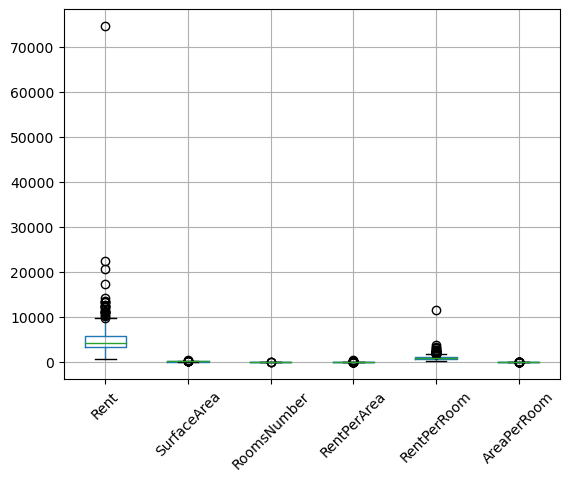

In [16]:
import matplotlib.pyplot as plt

df.boxplot(rot = 45)

In [17]:
def get_whiskers(df, col, WHIS):
    des = df.describe()
    q1 = des[col]['25%']
    q3 = des[col]['75%']
    iqr = q3 - q1
    return [q1 - WHIS * iqr, q3 + WHIS * iqr]

In [18]:
## Surface Area outliers
df[['SurfaceArea']].boxplot()

<Axes: >

In [19]:
# WHIS value is adjusted based on the manual study of the outliers
area_whiskers = get_whiskers(df, 'SurfaceArea', WHIS=3.5)  
area_whiskers

[-136.75, 395.25]

In [20]:
# how many area outliers?
area_outliers = (df['SurfaceArea'] > area_whiskers[1]) | (df['SurfaceArea'] < area_whiskers[0])
area_outliers.sum() 

1

In [21]:
df[area_outliers]

,Rent,SurfaceArea,RoomsNumber,Address,RentPerArea,RentPerRoom,AreaPerRoom
237,17440.0,550.0,7.5,"Bäckerstrasse 40, 8004 Zurich",31.709091,2325.333333,73.333333


## Rent per Area Outliers:

In [22]:
# it seems that having a price greater than 61CHF per m2 is not unusual for rooms for example.
rentPerArea_whiskers = get_whiskers(df, 'RentPerArea', WHIS=1.5)
rentPerArea_whiskers

[2.650793650793659, 72.74603174603173]

In [23]:
rentPerArea_outliers = (df['RentPerArea'] > rentPerArea_whiskers[1]) | (df['RentPerArea'] < rentPerArea_whiskers[0])
print(rentPerArea_outliers.sum())
df[rentPerArea_outliers].head()

52


,Rent,SurfaceArea,RoomsNumber,Address,RentPerArea,RentPerRoom,AreaPerRoom
18,74550.0,152.0,6.5,8008 Zurich,490.460526,11469.230769,23.384615
106,1950.0,22.0,2.0,"Schwamendingenstrasse 93, 8050 Zurich",88.636364,975.000000,11.000000
249,4790.0,63.0,3.5,"Zweierstrasse 119, 8003 Zurich",76.031746,1368.571429,18.000000
302,3100.0,41.0,3.0,"Hildastrasse 1, 8004 Zurich",75.609756,1033.333333,13.666667
315,5850.0,80.0,3.0,"Wolframplatz 1, 8045 Zurich",73.125000,1950.000000,26.666667


In [24]:
# Remove Rent per Area outliers to get proper statistical analysis of rent (especially mean)
df = df.drop(df[rentPerArea_outliers].index).reset_index()

In [26]:
# Plotting, majority gathered on price range 30-40CHF per m2, rental price of 2'500 CHF
plt.scatter(x = df['RentPerArea'], y = df['Rent'])

In [27]:
## Some statistical info
stats = df.describe()
stats

,index,Rent,SurfaceArea,RoomsNumber,RentPerArea,RentPerRoom,AreaPerRoom
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,353.460870,4983.217391,140.450435,5.367826,36.613804,964.313245,26.976301
std,236.100968,2426.107904,52.832790,1.922703,11.788642,389.373207,8.094584
min,0.000000,630.000000,18.000000,2.000000,4.500000,148.000000,9.000000
25%,151.500000,3350.000000,112.000000,4.500000,28.175872,734.714286,22.666667
50%,309.000000,4460.000000,140.000000,5.000000,34.588235,900.000000,26.000000
75%,572.500000,5940.000000,167.000000,6.500000,43.025424,1093.333333,29.600000
max,798.000000,22360.000000,550.000000,11.500000,72.352941,3726.666667,94.500000


In [28]:
stats['Rent']['mean']

4983.217391304348

In [120]:
# The mean rental price in Zurich is 4983 (4983.217391) CHF per month.
stats.Rent

count      575.000000
mean      4983.217391
std       2426.107904
min        630.000000
25%       3350.000000
50%       4460.000000
75%       5940.000000
max      22360.000000
Name: Rent, dtype: float64